# Descriptions

51 instances of the same experiment design executed in different experimental <b>batches</b>. Each batch represents a single cell type: <i>24 in HUVEC, 11 in RPE, 11 in HepG2, and 5 in U2OS</i>

In each and every batch, experimenters used:
- 4 plates of 16 x 24 grids. Each plate has 384 wells: 
    + 76 unused wells: unuse outer rows and columns of each plates as they are subject to greater environmental effects
    + 308 used ones:
        * 30 control wells:  each plate holds the <u>same</u> 30 control siRNA conditions
        * <b>277 different non-control siRNA</b> --> 277 x 4 = 1,108 different siRNAs were used to knockdown 1,108 different genes. The location of each of the 1,108 non-control siRNA conditions is randomized to prevent confounding effects of the location of a particular well.
        * 1 untreated well

- Each well in each plate contains <b>two</b> 512 x 512 x 6 images. The images were acquired from two non-overlapping regions of each well. 


There was a total of 125,510 total images representing 1,108 classes. For each image, the accompanying metadata provides the following information about the associated well
    1. its cell type
    2. its experiment
    3. its plate within the experiment
    4. its location on the plate
    5. its siRNA
    
Data sets:
- Train (33 batches, 36515 non-control examples + 4097 control examples):
HEPG2-01, HEPG2-02, HEPG2-03, HEPG2-04, HEPG2-05, HEPG2-06, HEPG2-07, HUVEC-01, HUVEC-02, HUVEC-03, HUVEC-04, HUVEC-05, HUVEC-06, HUVEC-07, HUVEC-08, HUVEC-09, HUVEC-10, HUVEC-11, HUVEC-12, HUVEC-13, HUVEC-14, HUVEC-15, HUVEC-16, RPE-01, RPE-02, RPE-03, RPE-04, RPE-05, RPE-06, RPE-07, U2OS-01, U2OS-02, U2OS-03

- Test (18 batches, 19897 non-control examples + 2246 control examples): Given the id_code of the well, we have to predict the sirna   
HEPG2-08, HEPG2-09, HEPG2-10, HEPG2-11, HUVEC-17, HUVEC-18, HUVEC-19, HUVEC-20, HUVEC-21, HUVEC-22, HUVEC-23, HUVEC-24, RPE-08, RPE-09, RPE-10, RPE-11, U2OS-04, U2OS-05  
Eg: id_code = HEPG2-08_1_B03 --> predict sirna = 911



Batch effects and Plate effects https://www.rxrx.ai/#The-Competition


In [0]:
import json
import os
import sys
import tensorflow as tf


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
sys.path.append('/content/gdrive/My Drive/colab/rxrx/rxrx1_utils')
from rxrx.main import main
import rxrx.io as rio

In [0]:
if 'google.colab' in sys.modules:
    from google.colab import auth
    auth.authenticate_user() #authentication is stored in '/content/adc.json'


# Explore the data

In [5]:
md = rio.combine_metadata() #read the metadata into md dataframe md.shape=(125510, 8)
md.head(10)

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,1,B02,negative_control
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,2,B02,negative_control
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,1,B03,treatment
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,2,B03,treatment
HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,NaN,1,B04,treatment
HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,NaN,2,B04,treatment
HEPG2-08_1_B05,HEPG2,test,HEPG2-08,1,NaN,1,B05,treatment
HEPG2-08_1_B05,HEPG2,test,HEPG2-08,1,NaN,2,B05,treatment
HEPG2-08_1_B06,HEPG2,test,HEPG2-08,1,NaN,1,B06,treatment


In [6]:
md.tail(10)

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
U2OS-03_4_O19,U2OS,train,U2OS-03,4,103.0,1,O19,treatment
U2OS-03_4_O19,U2OS,train,U2OS-03,4,103.0,2,O19,treatment
U2OS-03_4_O20,U2OS,train,U2OS-03,4,202.0,1,O20,treatment
U2OS-03_4_O20,U2OS,train,U2OS-03,4,202.0,2,O20,treatment
U2OS-03_4_O21,U2OS,train,U2OS-03,4,824.0,1,O21,treatment
U2OS-03_4_O21,U2OS,train,U2OS-03,4,824.0,2,O21,treatment
U2OS-03_4_O22,U2OS,train,U2OS-03,4,328.0,1,O22,treatment
U2OS-03_4_O22,U2OS,train,U2OS-03,4,328.0,2,O22,treatment
U2OS-03_4_O23,U2OS,train,U2OS-03,4,509.0,1,O23,treatment


In [7]:
print("Number of examples:", md.shape[0])
print("")
print("Number of negative control train examples:", md[(md['dataset']=='train') & (md['sirna'].notnull()) & (md['well_type']=='negative_control')].count()['dataset'])
print("Number of positive control train examples:", md[(md['dataset']=='train') & (md['sirna'].notnull()) & (md['well_type']=='positive_control')].count()['dataset'])
print("Number of non-control train examples (known sirna):", md[(md['dataset']=='train') & (md['sirna'].notnull()) & (md['well_type']=='treatment')].count()['dataset'])
print("")
print("Number of negative control test examples:", md[(md['dataset']=='test') & (md['sirna'].notnull()) & (md['well_type']=='negative_control')].count()['dataset'])
print("Number of positive control test examples:", md[(md['dataset']=='test') & (md['sirna'].notnull()) & (md['well_type']=='positive_control')].count()['dataset'])
print("Number of non-control test examples (unknown sirna):", md[(md['dataset']=='test') & (md['sirna'].isnull()) & (md['well_type']=='treatment')].count()['dataset'])


Number of examples: 125510

Number of negative control train examples: 306
Number of positive control train examples: 7888
Number of non-control train examples (known sirna): 73030

Number of negative control test examples: 186
Number of positive control test examples: 4306
Number of non-control test examples (unknown sirna): 39794


In [8]:
md.groupby(['experiment', 'well_type', 'dataset']).count()[['well']]

well
experiment well_type        dataset      
HEPG2-01   negative_control train      12
           positive_control train     240
           treatment        train    2212
HEPG2-02   negative_control train      12
           positive_control train     240
           treatment        train    2212
HEPG2-03   negative_control train       8
           positive_control train     240
           treatment        train    2216
HEPG2-04   negative_control train       8
           positive_control train     240
           treatment        train    2216
HEPG2-05   negative_control train       8
           positive_control train     240
           treatment        train    2216
HEPG2-06   negative_control train       8
           positive_control train     240
           treatment        train    2216
HEPG2-07   negative_control train      10
           positive_control train     238
           treatment        train    2212
HEPG2-08   negative_control test        8
           positive_control test      240
           treatment        test     2214
HEPG2-09   negative_control test       10
           positive_control test      238
           treatment        test     2216
HEPG2-10   negative_control test        8
           positive_control test      240
           treatment        test     2216
...                                   ...
RPE-07     negative_control train      10
           positive_control train     238
           treatment        train    2216
RPE-08     negative_control test        8
           positive_control test      240
           treatment        test     2216
RPE-09     negative_control test       10
           positive_control test      238
           treatment        test     2214
RPE-10     negative_control test        8
           positive_control test      240
           treatment        test     2216
RPE-11     negative_control test       10
           positive_control test      236
           treatment        test     2188
U2OS-01    negative_control train       8
           positive_control train     240
           treatment        train    2216
U2OS-02    negative_control train       8
           positive_control train     240
           treatment        train    2216
U2OS-03    negative_control train       8
           positive_control train     240
           treatment        train    2216
U2OS-04    negative_control test        8
           positive_control test      240
           treatment        test     2216
U2OS-05    negative_control test        8
           positive_control test      238
           treatment        test     2194

[153 rows x 1 columns]

In [9]:
md.loc[(md['well_type'] == 'treatment') & (md['experiment'] == 'HEPG2-06') & (md['sirna'] == 352)]

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
HEPG2-06_1_B03,HEPG2,train,HEPG2-06,1,352.0,1,B03,treatment
HEPG2-06_1_B03,HEPG2,train,HEPG2-06,1,352.0,2,B03,treatment


In [10]:
md.loc[(md['well_type'] == 'treatment') & (md['experiment'] == 'HEPG2-07') & (md['sirna'] == 352)]

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
HEPG2-07_1_D07,HEPG2,train,HEPG2-07,1,352.0,1,D07,treatment
HEPG2-07_1_D07,HEPG2,train,HEPG2-07,1,352.0,2,D07,treatment


In [0]:
#rio.load_site(dataset, experiment, plate, well, site, channels=(1, 2, 3, 4, 5, 6), base_path='gs://rxrx1-us-central1/images')
hepg2_07_neg_control = rio.load_site('train', 'HEPG2-07', 1, 'B02', 2) 
hepg2_07_pos_control = rio.load_site('train', 'HEPG2-07', 1, 'C03', 2) 
hepg2_07_treatment_sirna352 = rio.load_site('train', 'HEPG2-07', 1, 'D07', 1) 
hepg2_06_treatment_sirna352 = rio.load_site('train', 'HEPG2-06', 1, 'B03', 1) 

In [0]:
img_cmap = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds']
#img_cmap = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

#img_title = ['composite of 6 channels', 'channel 1', 'channel 2', 'channel 3', 'channel 4', 'channel 5', 'channel 6']
img_title = ['composite of 6 channels', 'nuclei', 'endoplasmic reticuli', 'actin', 'nucleoli', 'mitochondria', 'golgi apparatus']
img_inputs = ['neg control', 'pos control', 'hepg2-07 treated with sirna 352', 'hepg2-06 treated with sirna 352']
def show_seven_channels(t, img_input, showTitle=False):
  fig, axes = plt.subplots(1, 7, figsize=(18, 50)) 
  axes[0].set_xticklabels([])
  axes[0].set_yticklabels([])
  if showTitle:
    axes[0].set_title(img_title[0])
  axes[0].set_ylabel(img_input)
  axes[0].imshow(rio.convert_tensor_to_rgb(t))
  for j in range(6):
    axes[j+1].axis('off')
    if showTitle:
      axes[j+1].set_title(img_title[j+1])
    axes[j+1].imshow(t[:, :, j], cmap=img_cmap[j])


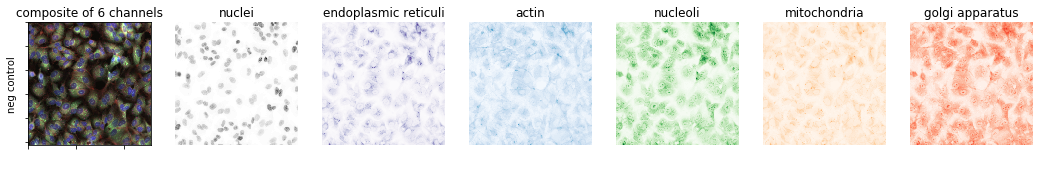

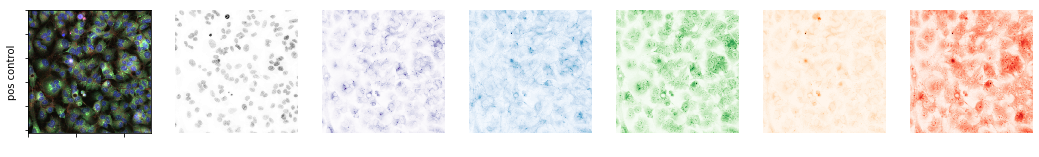

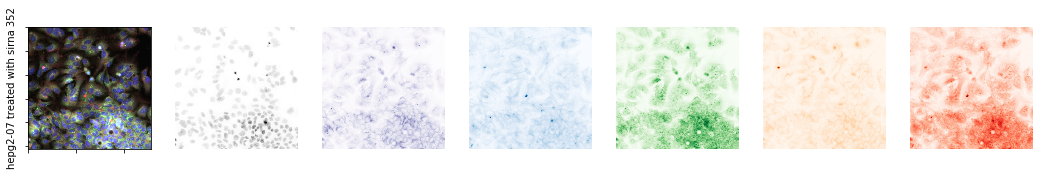

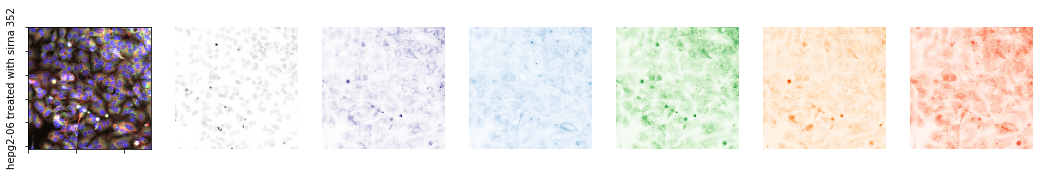

In [13]:
show_seven_channels(hepg2_07_neg_control, img_inputs[0], True)
show_seven_channels(hepg2_07_pos_control, img_inputs[1])
show_seven_channels(hepg2_07_treatment_sirna352, img_inputs[2])
show_seven_channels(hepg2_06_treatment_sirna352, img_inputs[3])

In [0]:
MODEL_DIR = 'gs://rxrx_lv/trial05'
URL_BASE_PATH = 'gs://rxrx1-us-central1/tfrecords/random-42'

# make sure we're in a TPU runtime
assert 'COLAB_TPU_ADDR' in os.environ

In [ ]:
# set TPU-relevant args 
tpu_grpc = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
num_shards = 8  # colab uses Cloud TPU v2-8
#print(tpu_grpc)

# upload credentials to the TPU
with tf.Session(tpu_grpc) as sess:
    data = json.load(open('/content/adc.json'))
    tf.contrib.cloud.configure_gcs(sess, credentials=data)

# If it is set to the level as displayed (INFO), then TensorFlow will tell 
# me all messages that have the label INFO (or more critical)
tf.logging.set_verbosity(tf.logging.INFO) 

main(use_tpu=True,
     tpu=tpu_grpc,
     gcp_project=None,
     tpu_zone=None,
     url_base_path=URL_BASE_PATH,
     use_cache=False,
     model_dir=MODEL_DIR,
     train_epochs=4,         #train_steps = steps_per_epoch * train_epochs
     train_batch_size=64,   #steps_per_epoch = (num_train_images // train_batch_size)
     predict_batch_size=64,
     num_train_images=73030, #steps_per_epoch = (num_train_images // train_batch_size)
     epochs_per_loop=5,
     log_step_count_epochs=1,
     num_cores=num_shards,
     data_format='channels_last',
     transpose_input=True,
     tf_precision='bfloat16',
     n_classes=1108,
     momentum=0.9,
     weight_decay=1e-4,
     base_learning_rate=0.2,
     warmup_epochs=5)